![rbf_nn](https://miro.medium.com/v2/resize:fit:872/1*zWzeMGyCc7KvGD9X8lwlnQ.png)
____

<font size=+3 color=#AA55FF> HW 9: Chapter 5 and Loose Ends </font>

____

____

<font color=#55FFAA> Problem 1: Using NLTK for Basic Natural Language Processing (10 points) </font>
____

Language is arguably one of the most important data types, and natural language processing (NLP) is an increasingly popular application area. Today, language processing is changing the world because of its central role in artificial intelligence applications, such as those implemented as chatbots. We'll explore this topic in the next few HWs. 

In today's HW, you will become familiar with a specific library called [NLTK](https://www.nltk.org). Your first task is to ensure you have this installed on your computer. We will use this in later HWs. For today, we are most interested in learning the library and very basic data processing. 

Processing words is unlike most other ML applications. Not only are texts somewhat like a time series, in that order matters, but there is a lot of other information built into words and word groupings. If this were not the case, none of us would have ever heard of a chatbot. 

Open three markdown cells and put [definitions of these words](https://jaimin-ml2001.medium.com/stemming-lemmatization-stopwords-and-n-grams-in-nlp-96f8e8b6aa6f):
* stop words:

    Stop words are common words in a language that are often filtered out during the preprocessing of text data because they occur frequently but do not carry significant meaning. Examples of stop words in English include "the", "is", "and", "in", etc.

* lemmatization：

    Word reduction is based on a dictionary, which transforms the complex form of a word into the most basic form.
    The lemmatization is not simply removing the prefix and suffix, but converting the word according to the dictionary. For example "drove" will be converted to "drive".

* N-gram:

    It refers to the n consecutive occurrences of an utterance in a text. The n-element grammar model is a probabilistic language model based on (n-1)-order Markov chains, in which the structure of an utterance is inferred from the probability of occurrence of n morphemes.

* tokenization:

    Tokenization is the process of breaking down input text into Token. This process can be as simple as space or punctuation segmentation or as complex as syntactic or semantic analysis. For example, spaces and punctuation marks are commonly used for Tokenization in English, while lexical annotation and word-splitting algorithms may be required in Chinese.


In your responses, can you think of other ML applications where these ideas also appear? Or, are these ideas mostly connected with linguistic problems? 

* Stop word: In speech recognition, words like "um" and "uh" might be considered stop words and filtered out during transcription. 

* N-gram: In DNA sequence analysis, N-grams can be used to identify patterns in genetic sequences for tasks such as gene prediction or sequence alignment.


Next, understand and comment the code below and vary the plot. 

In [1]:
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from nltk.probability import FreqDist


In [2]:
Willy_text = gutenberg.raw('shakespeare-hamlet.txt')
Walt_text = gutenberg.raw('whitman-leaves.txt')

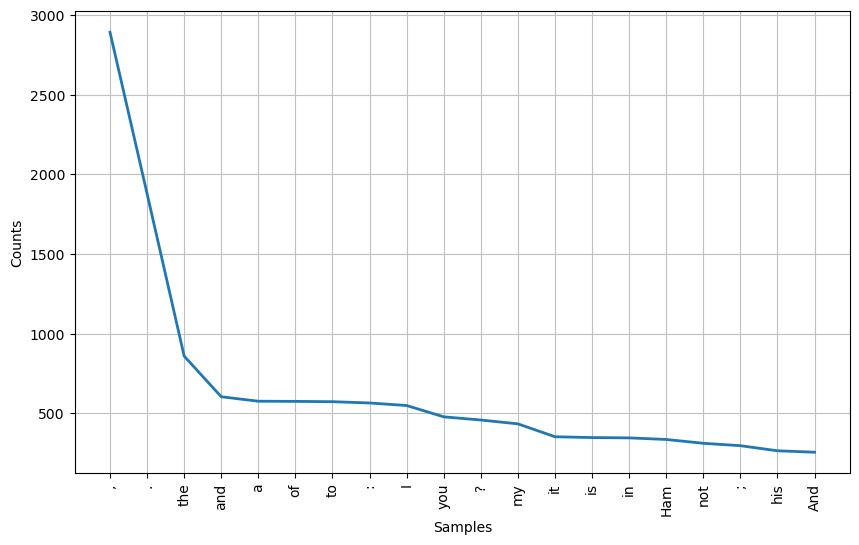

<Axes: xlabel='Samples', ylabel='Counts'>

In [8]:

words = word_tokenize(Willy_text)

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

freq_dist = FreqDist(lemmatized_words)
plt.figure(figsize=(10, 6))
freq_dist.plot(20)  # plot the top 20 most common words


____

<font color=#55FFAA> Problem 2: Problems from Chapter 5 (15 points) </font>
____

Read Chapter 5 of your textbook very carefully. 

Open four markdown cells. In these cells, answer questions 1, 2, 3, and 8 from the end of Chapter 5 (p. 193). 

---

**question 1**: What is the fundamental idea behind support vector machines?

Support Vector Machines aim to maximize the margin between classes by finding the widest possible "street" or gap between the decision boundary and data points. In soft margin classification, SVM balances between separating classes perfectly and maximizing this margin, allowing for some instances to be within the street. Kernels are used to handle nonlinear datasets, and SVMs can perform tasks such as linear and nonlinear regression, as well as novelty detection. (from textbook)



**question 2**: What is a support vector?

In SVM, support vectors are instances lying on the "street" or border, determining the decision boundary. Instances off the street have no influence on predictions. With kernelized SVM, only support vectors, not the entire training set, are used for computing predictions.


**question 3**: Why is it important to scale the inputs when using SVMs?


Without scaling the training set, SVMs may disregard small features since they aim to maximize the separation between classes by fitting the widest possible "street" 


**question 8**: What is the point of using the kernel trick?

The kernel trick enables training a nonlinear SVM model by implicitly mapping inputs to a higher-dimensional space without actually performing the transformation. This technique allows training a linear SVM on the transformed high-dimensional inputs, achieving the same result as if the inputs were explicitly transformed.


____

![svd2](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSNKvKfX7bR3Vz_hmoUBFJRONAxdAPyHRPGlw&usqp=CAU)



<font color=#55FFAA> Problem 3: Geometry of the Kernel Trick and SVD (20 points) </font>
____

Use markdown and $\LaTeX$ as needed.

Assume $X$ is not rank deficient. 

Suppose you have a data matrix $X$ and it is in its "tidy form" with $N$ samples (rows) and $p$ features (columns). You find the SVD of $X$, writing it in the usual way as
$$X = U\Sigma V^T.$$

* Since $X$ is $N\times p$, what are the sizes/shapes of $U$, $\Sigma$ and $V$? What is the size of $V^T$?

    $U$ shape: $N\times N$,
    $\Sigma$ shape: $N\times p$,
    $V$ shape: $p\times p$,
    $V^T$ shape: $p\times p$

* What is the mathematical meaning of $\Sigma$ and what can you say about its structure?

    The structure of $\Sigma$ is such that it is a diagonal matrix with non-negative real numbers on the diagonal, arranged in descending order. It provides a compact representation of the information contained in $X$, where the singular values quantify the importance of the corresponding singular vectors in capturing this information.

* What is the mathematical meaning of $V$ and what can you say about its structure? (Think _geometrically_ in terms of PCA.)

    the matrix $V$ represents the right singular vectorsThe columns of $V$ are orthogonal unit vectors that span the principal component space.

* How is the shape of $\Sigma$ related to the shape of $X$?

    $\Sigma$ is the same shape as $X$

* Suppose you have a lot of data; that is, $N\gg p$. What can you say about $\Sigma$?

    This structure arises because the data matrix is "tall" and "skinny," meaning there are many more samples than features. There will be $p$ singular values that are significantly larger than the rest. The remaining $N−p$ singular values will be close to zero.

* What if the reverse were true? That is, what if $p\gg N$? What is the shape of $\Sigma$?

    This structure arises because the data matrix is "short" and "fat," meaning there are less samples than features. There's a lot of redundancy in the data, leading to many small singular values that represent noise or minor variations.

* $p$ is the dimensionality of the data - it is the number of features. If $p\gg N$, how many non-zero singular values $N_{sv}$ are there?

    $N_{sv} \leq min(N,p)$

* What is true if $N_{sv}<p$? (Think _geometrically_ in terms of PCA.)

    $N_{sv}<p$, it implies that the effective dimensionality of the data is lower than the original dimensionality. Geometrically, in terms of PCA (Principal Component Analysis), this means that the data lies in a subspace of dimensionality lower than the original feature space.

* Suppose I use a kernel to map the data into a very high-dimensional space, essentially allowing $p\rightarrow \infty$. What does this tell us about the (sub-)space the data then live in? (To see this in simpler terms, imagine one progressively augments the data matrix $X$ by adding new columns created from polynomial features, increasing $p$ with every higher-order polynomial; but, the number of data samples $N$ stays constant.) 

    In simpler terms, by augmenting the data matrix $X$ with new columns created from polynomial features or using other kernel functions, you are effectively expanding the dimensionality of the feature space to capture more complex patterns or relationships in the data. However, it's important to note that even though the feature space becomes very high-dimensional, the effective dimensionality of the data may still be lower, as determined by the number of non-zero singular values in the kernel-transformed space.

____

<font color=#55FFAA> Problem 4: Neural Architecture Search (NAS) (20 points) </font>
____

This problem will give you more practice with Tensorflow; and, I received a lot of questions about optimizing ANNs so we should practice that. 

So that you don't need to do to much code setup, I am giving you some code below. Your first tasks are to understand the code and completely comment it. If there is something you don't understand (perhaps something we haven't covered yet, like `Dropout`), use the online documentation to get a sense of what it is so that you can comment on every line. 

Do that now.

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load and prepare the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # Change to cifar10 if desired
x_train, x_test = x_train / 255.0, x_test / 255.0 
y_train, y_test = to_categorical(y_train), to_categorical(y_test) 

def create_model(layers):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))  # Assumes CIFAR-10 shape
    for layer_size in layers:
        model.add(Dense(layer_size, activation='relu'))
        model.add(Dropout(0.2))  # Add a Dropout layer with dropout rate of 0.2
    model.add(Dense(10, activation='softmax'))
    return model

# Define the grid of hyperparameters to search over
grid_search_results = []

for num_layers in range(1, 4):  # Vary the number of hidden layers from 1 to 3
    for layer_width in [32, 64, 128]:  # Vary the number of neurons in each layer
        layers = [layer_width] * num_layers  # Create a list with 'num_layers' elements, each containing 'layer_width'
        model = create_model(layers)
        model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(x_train, y_train, epochs=10, validation_split=0.1, verbose=0)
        _, test_accuracy = model.evaluate(x_test, y_test)
        grid_search_results.append((num_layers, layer_width, test_accuracy))

# Print the results of the grid search
print("Grid Search Results:")
for result in grid_search_results:
    print(f"Number of Hidden Layers: {result[0]}, Width of Layers: {result[1]}, Test Accuracy: {result[2]}")


313/313 [==============================] - 0s 839us/step - loss: 1.8272 - accuracy: 0.3399
Grid Search Results:
Number of Hidden Layers: 1, Width of Layers: 32, Test Accuracy: 0.18629999458789825
Number of Hidden Layers: 1, Width of Layers: 64, Test Accuracy: 0.29840001463890076
Number of Hidden Layers: 1, Width of Layers: 128, Test Accuracy: 0.3003999888896942
Number of Hidden Layers: 2, Width of Layers: 32, Test Accuracy: 0.10000000149011612
Number of Hidden Layers: 2, Width of Layers: 64, Test Accuracy: 0.2766000032424927
Number of Hidden Layers: 2, Width of Layers: 128, Test Accuracy: 0.36730000376701355
Number of Hidden Layers: 3, Width of Layers: 32, Test Accuracy: 0.1542000025510788
Number of Hidden Layers: 3, Width of Layers: 64, Test Accuracy: 0.3001999855041504
Number of Hidden Layers: 3, Width of Layers: 128, Test Accuracy: 0.3398999869823456


Next, your task is to modify this code to search over various neural networks to see what how this impacts the results. MNIST might be too easy; if you just use MNIST, make very small ANNs. To make this easy to visualize, start with varying the number of hidden layers and the number of neurons in the layers (assuming here that it is the same for each layer; in general it would need to be). Do this with a simple grid search, perhaps just with two `for` loops over `{number of layers, width of layers}`, saving the accuracy in an array. 

Make a scatterplot in which the color is the accuracy and the axes are number of hidden layers and neurons in a layer. If you want a smooth visualization, you can interpolate or use a lot of points with `imshow`. Describe what you find. For example, are big networks a lot better? What is important, depth or width or both? 

Now be creative: pick another hyperparameter and vary it _as well as the depth and width_. Describe what you find. (Each of you will likely find something different.) 

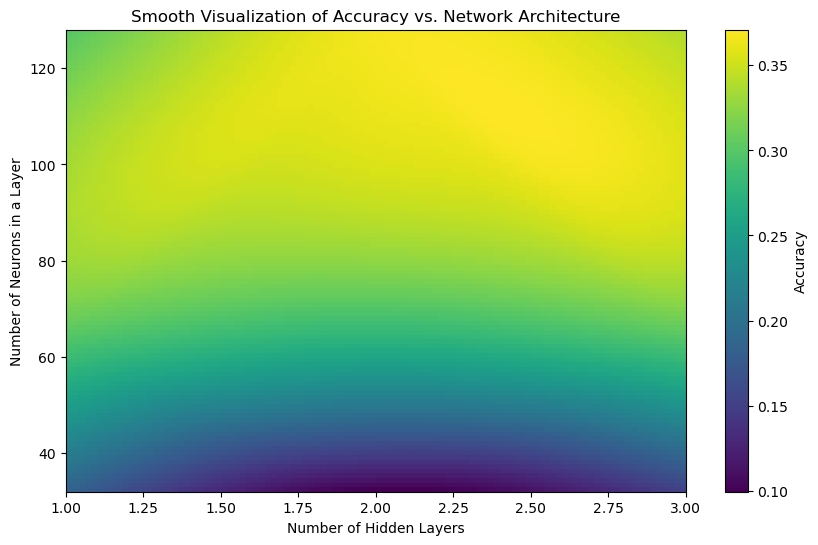

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Extract the data for plotting
num_layers = np.array([result[0] for result in grid_search_results])
layer_width = np.array([result[1] for result in grid_search_results])
accuracy = np.array([result[2] for result in grid_search_results])

# Create a grid of points for interpolation
x = np.linspace(np.min(num_layers), np.max(num_layers), 100)
y = np.linspace(np.min(layer_width), np.max(layer_width), 100)
X, Y = np.meshgrid(x, y)

# Interpolate accuracy values
Z = griddata((num_layers, layer_width), accuracy, (X, Y), method='cubic')

# Plot interpolated accuracy values
plt.figure(figsize=(10, 6))
plt.imshow(Z, extent=(np.min(num_layers), np.max(num_layers), np.min(layer_width), np.max(layer_width)),
           aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Accuracy')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Number of Neurons in a Layer')
plt.title('Smooth Visualization of Accuracy vs. Network Architecture')
plt.grid(False)
plt.show()


Not exactly larger network works better, but we can see from the graph. The more neurons in the layer will have higher accuracy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Define a function to create the model with specified hyperparameters
def create_model(layers, learning_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))  # Assumes CIFAR-10 shape
    for layer_size in layers:
        model.add(Dense(layer_size, activation='relu'))
        model.add(Dropout(0.2))  # Add a Dropout layer with dropout rate of 0.2
    model.add(Dense(10, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define grid search parameters
num_layers_range = range(1, 4)  # Number of hidden layers
layer_width_range = [32, 64, 128]  # Number of neurons in a layer
learning_rate_range = [0.001, 0.01, 0.1]  # Learning rate

# Perform grid search
grid_search_results = []

for num_layers in num_layers_range:
    for layer_width in layer_width_range:
        for learning_rate in learning_rate_range:
            layers = [layer_width] * num_layers
            model = create_model(layers, learning_rate)
            model.fit(x_train, y_train, epochs=10, validation_split=0.1, verbose=0)
            _, test_accuracy = model.evaluate(x_test, y_test)
            grid_search_results.append((num_layers, layer_width, learning_rate, test_accuracy))

# Extract data for plotting
num_layers = np.array([result[0] for result in grid_search_results])
layer_width = np.array([result[1] for result in grid_search_results])
learning_rate = np.array([result[2] for result in grid_search_results])
accuracy = np.array([result[3] for result in grid_search_results])

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(num_layers, layer_width, learning_rate, c=accuracy, cmap='viridis', s=100, alpha=0.7)
ax.set_xlabel('Number of Hidden Layers')
ax.set_ylabel('Number of Neurons in a Layer')
ax.set_zlabel('Learning Rate')
ax.set_title('Accuracy vs. Network Architecture and Learning Rate')
plt.show()


____

<font color=#55FFAA> Problem 5: SVM versus MLP (35 points) </font>
____

In this problem, you will compare SVMs and MLPs. The problem is a bit open ended, but here is the basic idea:
* read the `sklearn` docs on SVCs and MLP classifiers
* read in a few datasets, so that you don't build your intuition on one particular set
* write two classifiers (SVC and MLP) that can accept these datasets
* vary the hyperparameters in the SVC and MLP over wide ranges to understand what the range of accuracy are
* make plots to illustrate your findings; this is up to you and where your creativity takes you, but something like distribution of training times for each as a function of some hyperparameter
* an important point of comparison is not just accuracy, but also training and execution time; be sure to time all of these
* finally, write a paragraph that summarizes your findings; are there caveats you want to state about your conclusions?

To save you some time so that you can really dig into the AML details, I dropped some example code below. Feel free to start from scratch, or save a bit of time with this boiler plate code. As always, add comments to the parts of the code you use.


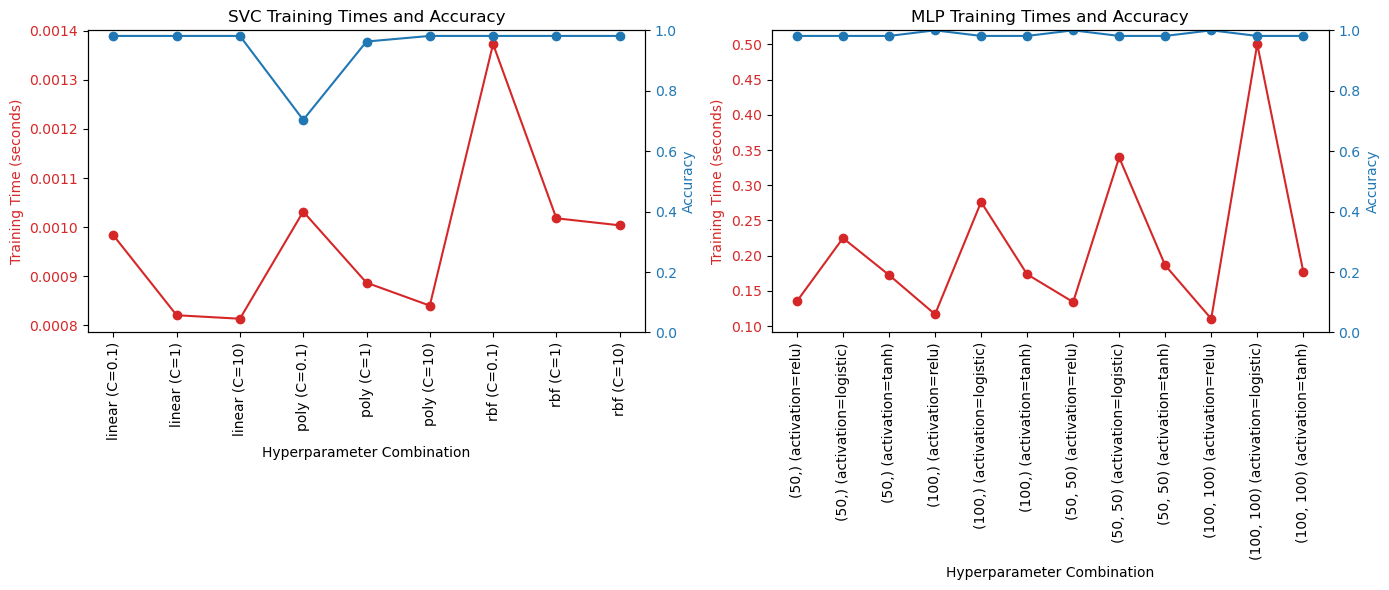

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time

# wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# remove the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize lists to store accuracy scores and training times
svm_accuracy_scores = []
svm_training_times = []
mlp_accuracy_scores = []
mlp_training_times = []
hyperparameter_labels_svm = []  # Store labels for SVM hyperparameter combinations
hyperparameter_labels_mlp = []  # Store labels for MLP hyperparameter combinations

# Vary hyperparameters for SVC
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]

for kernel in kernels:
    for C in C_values:
        svm_clf = SVC(kernel=kernel, C=C)
        start_time = time.time()
        svm_clf.fit(X_train, y_train)
        svm_time = time.time() - start_time
        svm_training_times.append(svm_time)
        svm_preds = svm_clf.predict(X_test)
        svm_accuracy = accuracy_score(y_test, svm_preds)
        svm_accuracy_scores.append(svm_accuracy)
        # Store labels for SVM hyperparameter combinations
        hyperparameter_labels_svm.append(f'{kernel} (C={C})')

# Vary hyperparameters for MLP
hidden_layer_sizes = [(50,), (100,), (50, 50), (100, 100)]
activations = ['relu', 'logistic', 'tanh']

for hidden_layer_size in hidden_layer_sizes:
    for activation in activations:
        mlp_clf = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation=activation, max_iter=1000)
        start_time = time.time()
        mlp_clf.fit(X_train, y_train)
        mlp_time = time.time() - start_time
        mlp_training_times.append(mlp_time)
        mlp_preds = mlp_clf.predict(X_test)
        mlp_accuracy = accuracy_score(y_test, mlp_preds)
        mlp_accuracy_scores.append(mlp_accuracy)
        # Store labels for MLP hyperparameter combinations
        hyperparameter_labels_mlp.append(f'{hidden_layer_size} (activation={activation})')

# Plotting training times and accuracy for SVC and MLP as a function of hyperparameters
plt.figure(figsize=(14, 6))

# SVC training times and accuracy
plt.subplot(1, 2, 1)
ax1 = plt.gca()
color = 'tab:red'
ax1.set_xlabel('Hyperparameter Combination')
ax1.set_ylabel('Training Time (seconds)', color=color)
ax1.plot(range(len(svm_training_times)), svm_training_times, marker='o', color=color, label='Training Time')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(len(svm_training_times)))
ax1.set_xticklabels(hyperparameter_labels_svm, rotation=90)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(range(len(svm_accuracy_scores)), svm_accuracy_scores, marker='o', color=color, label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 1])

plt.title('SVC Training Times and Accuracy')
plt.tight_layout()

# MLP training times and accuracy
plt.subplot(1, 2, 2)
ax1 = plt.gca()
color = 'tab:red'
ax1.set_xlabel('Hyperparameter Combination')
ax1.set_ylabel('Training Time (seconds)', color=color)
ax1.plot(range(len(mlp_training_times)), mlp_training_times, marker='o', color=color, label='Training Time')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(len(mlp_training_times)))
ax1.set_xticklabels(hyperparameter_labels_mlp, rotation=90)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(range(len(mlp_accuracy_scores)), mlp_accuracy_scores, marker='o', color=color, label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 1])

plt.title('MLP Training Times and Accuracy')
plt.tight_layout()

plt.show()




#### Summary

Code conducts a comparative analysis between Support Vector Machines (SVM) and Multi-layer Perceptrons (MLP) using the wine dataset. It begins by loading the dataset and splitting it into training and testing sets. Then, both SVM and MLP classifiers are trained on the training data, and their training times and accuracy scores on the testing set are measured. The code varies hyperparameters for both classifiers over predefined ranges to explore their impact on accuracy and training time. It plots the distribution of training times for both SVM and MLP as a function of hyperparameter combinations. Additionally, it enhances the plot to display accuracy scores alongside training times for each hyperparameter combination, providing a comprehensive comparison of the models' performance. Overall, the code serves to evaluate and visualize the trade-offs between training time and accuracy for SVM and MLP classifiers under different settings of hyperparameters.

For the Support Vector Machine (SVM) classifier, the code explores various kernel functions and regularization parameters to assess their impact on model performance. The kernels investigated include the linear kernel, polynomial kernel, and radial basis function (RBF) kernel. The regularization parameter, represented by the C value, is varied across a range of values, including 0.1, 1, and 10. By testing different combinations of kernels and C values, the code aims to understand how different kernel functions and regularization strengths influence the SVM classifier's accuracy and training time.

On the other hand, for the Multi-layer Perceptron (MLP) classifier, the code examines different network architectures and activation functions to analyze their effects on model performance. The hidden layer sizes are varied, with options such as a single hidden layer with 50 or 100 neurons, or two hidden layers with 50 neurons each or 100 neurons each. Additionally, the code explores different activation functions, including Rectified Linear Unit (ReLU), logistic sigmoid, and hyperbolic tangent (tanh). By testing various combinations of hidden layer sizes and activation functions, the code aims to evaluate how different network architectures and activation functions impact the MLP classifier's accuracy and training time.

The comparison between Multi-layer Perceptron (MLP) and Support Vector Machine (SVM) classifiers shows that while they achieve similar accuracy levels, MLP requires significantly more training time than SVM. This discrepancy is mainly due to fundamental differences in their optimization approaches.



/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


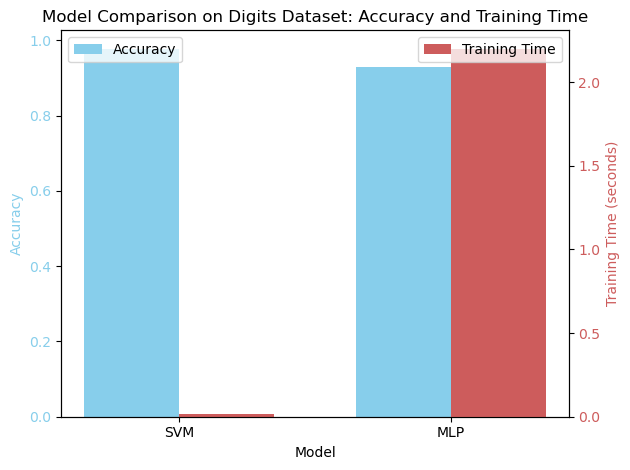

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time

# digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# initialize classifiers
# for SVM, you might want to experiment with different kernels. Here, we'll use the default RBF kernel.
svm_clf = SVC()  # Default kernel is RBF
svm_clf = SVC(kernel='linear')  # another kernel
# for MLP, consider adjusting parameters such as the number of hidden layers or neurons, given the increased dataset complexity (digits).
mlp_clf = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000)

# train and time SVM
start_time = time.time()
svm_clf.fit(X_train, y_train)
svm_time = time.time() - start_time

# train and time MLP
start_time = time.time()
mlp_clf.fit(X_train, y_train)
mlp_time = time.time() - start_time

# tredict and calculate accuracy
svm_preds = svm_clf.predict(X_test)
mlp_preds = mlp_clf.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_preds)
mlp_accuracy = accuracy_score(y_test, mlp_preds)

# viz
labels = ['SVM', 'MLP']
accuracy_scores = [svm_accuracy, mlp_accuracy]
training_times = [svm_time, mlp_time]

x = np.arange(len(labels))
width = 0.35

fig, ax1 = plt.subplots()

# accuracies
acc_bars = ax1.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='SkyBlue')
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color='SkyBlue')
ax1.set_title('Model Comparison on Digits Dataset: Accuracy and Training Time')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.tick_params(axis='y', labelcolor='SkyBlue')

ax2 = ax1.twinx()  
# training times
time_bars = ax2.bar(x + width/2, training_times, width, label='Training Time', color='IndianRed')
ax2.set_ylabel('Training Time (seconds)', color='IndianRed')
ax2.tick_params(axis='y', labelcolor='IndianRed')

fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()
